In [9]:
import osmnx as ox
import networkx as nx
import joblib
import pandas as pd
import numpy as np
import json,random
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
place="Delhi , India"
G=ox.graph_from_place(place, network_type="drive",simplify=True)
print("Graph loaded")

Graph loaded


In [11]:
risk_model=joblib.load("risk_model.pkl")

In [12]:
def predict_edge_risk(edge):
    features = {
        "length": edge.get("length",100),
        "road_type": random.choice([0,1,2]),
        "elevation": random.uniform(200,260),
        "flood_reports": random.randint(0,10),
        "traffic_speed": random.uniform(5,60),
        "is_night":random.randint(0,1)
    }
    X=pd.DataFrame([features])
    return float(risk_model.predict(X)[0])

In [14]:
for u,v,k,data in G.edges(keys=True,data=True):
    risk=predict_edge_risk(data)
    length=data.get("length",1)

    data["risk_weight"]=length*(1+risk)

print("Risks weight added to graph")

Risks weight added to graph


In [16]:
start = (28.6139, 77.2090)   # Connaught Place
end   = (28.7041, 77.1025)   # Rohini

start_node=ox.nearest_nodes(G,start[1],start[0])
end_node=ox.nearest_nodes(G,end[1],end[0])

safe_path=nx.shortest_path(G,start_node,end_node,weight="risk_weight")

print("Safe route computed")

Safe route computed


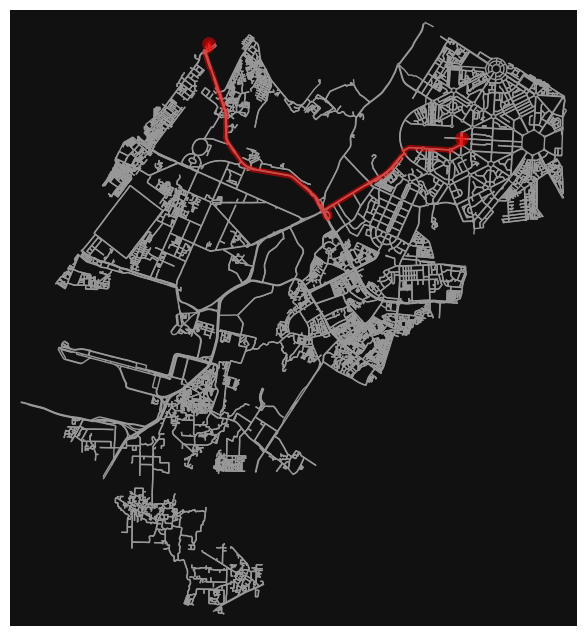

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [19]:
ox.plot_graph_route(
    G,
    safe_path,
    route_color="red",
    route_linewidth=4,
    node_size=0
)